In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\HP PC\Downloads\WELFake_Dataset.csv.zip')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
X=df.drop('label',axis=1)

In [5]:
X.head()

,Unnamed: 0,title,text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
1,1,NaN,Did they post their votes for Hillary already?
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."


In [6]:
Y=df['label']

In [7]:
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [8]:
df.shape

(72134, 4)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
df=df.dropna()

In [11]:
messages=df.copy()

In [12]:
messages.reset_index(inplace=True)

In [13]:
messages['title'][7]

'Sports Bar Owner Bans NFL Games…Will Show Only ‘True American’ Sports: ‘I’d like to speak for rural America’ [Video]'

In [14]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\HP
[nltk_data]    |     PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\HP
[nltk_data]    |     PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\HP PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\HP PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\HP PC\AppData\Roaming\nltk_data...
[

True

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

ps = PorterStemmer()
corpus = []


for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])  # Fix regex
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

    

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [17]:
X.shape

(71537, 5000)

In [18]:
Y=messages['label']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=0)

In [20]:
features = cv.get_feature_names_out()
print(features[:20])


['abandon' 'abba' 'abc' 'abc news' 'abduct' 'abe' 'abedin' 'abl' 'abort'
 'abroad' 'absolut' 'absurd' 'abus' 'academ' 'accept' 'access'
 'access pipelin' 'accid' 'accident' 'accomplish']


In [21]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [22]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [23]:
count_df.head()

,abandon,abba,abc,abc news,abduct,abe,abedin,abl,abort,abroad,...,zealand,zero,zika,zika viru,zimbabw,zimbabw mugab,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [28]:
from sklearn import metrics
import numpy as np
import itertools

accuracy: 0.869
Confusion matrix, without normalization


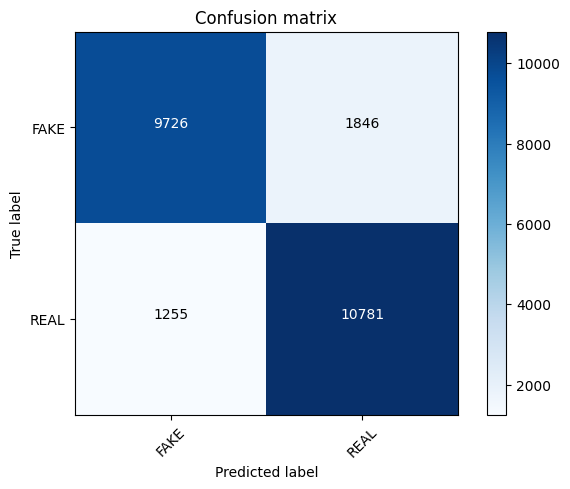

In [31]:
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [33]:
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
score


0.8686462216197899

In [34]:
Y_train.shape

(47929,)

In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)


accuracy:   0.862
Confusion matrix, without normalization


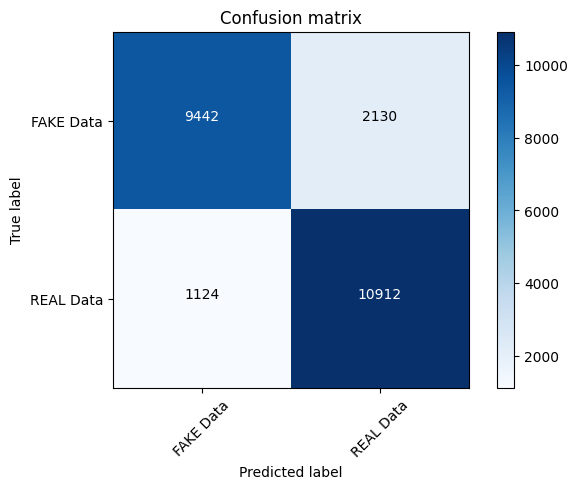

In [38]:


linear_clf.fit(X_train, Y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [39]:
classifier=MultinomialNB(alpha=0.1)

In [44]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,Y_train)
    Y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(Y_test, Y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))


C:\Users\HP PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\HP PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Score : 0.49017282277194174
Alpha: 0.1, Score : 0.8688580142324636
Alpha: 0.2, Score : 0.8689850898000677
Alpha: 0.30000000000000004, Score : 0.8689003727549983
Alpha: 0.4, Score : 0.8686462216197899
Alpha: 0.5, Score : 0.8686038630972551
Alpha: 0.6000000000000001, Score : 0.8686885801423246
Alpha: 0.7000000000000001, Score : 0.8686462216197899
Alpha: 0.8, Score : 0.8688156557099288
Alpha: 0.9, Score : 0.8687309386648594


In [46]:
## Get Features names
feature_names = cv.get_feature_names_out()


In [48]:
classifier.feature_log_prob_


array([[ -9.02207843,  -9.39152068,  -9.02207843, ...,  -9.10244294,
         -9.98378664,  -8.78284874],
       [ -9.06648656, -11.75325936,  -8.76016213, ..., -12.50047376,
         -9.51031253, -12.50047376]], shape=(2, 5000))

In [51]:


### Most real
sorted(zip(classifier.feature_log_prob_.flatten(), feature_names * classifier.feature_log_prob_.shape[0]), reverse=True)[:20]


[(np.float64(-3.616951786833363), 'trumptrump'),
 (np.float64(-3.7172379795627055), 'newnew'),
 (np.float64(-3.8707527415137832), 'timetime'),
 (np.float64(-3.8908555100038207), 'yorkyork'),
 (np.float64(-3.8908555100038207), 'new yorknew york'),
 (np.float64(-3.923083457959578), 'york timeyork time'),
 (np.float64(-3.923083457959578), 'new york timenew york time'),
 (np.float64(-4.462366124593006), 'saysay'),
 (np.float64(-4.8708865236610155), 'breitbartbreitbart'),
 (np.float64(-5.149510910351387), 'houshous'),
 (np.float64(-5.442320304345653), 'clintonclinton'),
 (np.float64(-5.46849695438204), 'senatsenat'),
 (np.float64(-5.519505291322277), 'obamaobama'),
 (np.float64(-5.5418486479002755), 'republicanrepublican'),
 (np.float64(-5.593085613251132), 'statestate'),
 (np.float64(-5.655048907633289), 'russiarussia'),
 (np.float64(-5.6847848463509605), 'whitewhite'),
 (np.float64(-5.736879958234362), 'northnorth'),
 (np.float64(-5.745589550233852), 'presidpresid'),
 (np.float64(-5.78574

In [54]:
### Most fake
sorted(zip(classifier.feature_log_prob_[1], feature_names))[:5000]


[(np.float64(-12.500473761236648), 'aid worker'),
 (np.float64(-12.500473761236648), 'al zor'),
 (np.float64(-12.500473761236648), 'anc'),
 (np.float64(-12.500473761236648), 'argentin'),
 (np.float64(-12.500473761236648), 'assail'),
 (np.float64(-12.500473761236648), 'back new'),
 (np.float64(-12.500473761236648), 'bali'),
 (np.float64(-12.500473761236648), 'bangladesh'),
 (np.float64(-12.500473761236648), 'boko'),
 (np.float64(-12.500473761236648), 'boko haram'),
 (np.float64(-12.500473761236648), 'bomb kill'),
 (np.float64(-12.500473761236648), 'breitbart news daili'),
 (np.float64(-12.500473761236648), 'brexit deal'),
 (np.float64(-12.500473761236648), 'brexit talk'),
 (np.float64(-12.500473761236648), 'brexit transit'),
 (np.float64(-12.500473761236648), 'brief new'),
 (np.float64(-12.500473761236648), 'brief new york'),
 (np.float64(-12.500473761236648), 'british pm'),
 (np.float64(-12.500473761236648), 'british pm may'),
 (np.float64(-12.500473761236648), 'california today'),
 (n